In [21]:
from pandas import Series, DataFrame
import pandas as pd
import re
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv("C:/Users/Avani/Downloads/all/Test_rev1/Test_rev1.csv", dtype=unicode)

In [3]:
train.head(2)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SourceName
0,11888454,Business Development Manager,The Company: Our client is a national training...,"Tyne Wear, North East",Newcastle Upon Tyne,NaN,permanent,Asset Appointments,Teaching Jobs,cv-library.co.uk
1,11988350,Internal Account Manager,The Company: Founded in **** our client is a U...,"Tyne and Wear, North East",Newcastle Upon Tyne,NaN,permanent,Asset Appointments,Consultancy Jobs,cv-library.co.uk


In [6]:
train.columns.values

array(['Id', 'Title', 'FullDescription', 'LocationRaw',
       'LocationNormalized', 'ContractType', 'ContractTime', 'Company',
       'Category', 'SourceName'], dtype=object)

### Part A Basic Text Mining

Randomly select 2500 data points (the training dataset train_rev1 contains nearly 250k) for ease of analysis. <br/>
(A1) What are the top 5 parts of speech in the job descriptions? How frequently do they appear? How do these numbers change if you exclude stopwords?

In [7]:
train_subset=train[['Id', 'Title', 'FullDescription']]

In [8]:
train_subset.head(2)

,Id,Title,FullDescription
0,11888454,Business Development Manager,The Company: Our client is a national training...
1,11988350,Internal Account Manager,The Company: Founded in **** our client is a U...


In [9]:
train_subset1=train_subset.sample(n=2500, replace=False)

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [11]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [17]:
# Concatenating the job descriptions, each row in tempx contains all job descriptions concatenated row by row from job descriptions column
train_subset1['tempx']=train_subset1['FullDescription'].str.cat(sep=' ')

# Tempx has only one unique value
len(train_subset1['tempx'].value_counts())

1

In [114]:
# converting the tempx dataitem to lowercase & converting to utf-8
pos=train_subset1['tempx'].iloc[0].lower()
pos =pos.decode('utf-8')

In [115]:
pos[:100]

u'please note  candidates must be available to interview immediately with a view to start immediately '

In [278]:
#### this is for getting exact parts of speech
import nltk
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


In [280]:
# tokenizing, we remove all punctuations, numbers etc.
from string import punctuation
for p in punctuation:
    pos =pos.replace(p,'')
s =re.sub('[0-9]+','',pos)
words =re.findall('\w+',s)
POS=nltk.pos_tag(words)
words =re.findall('\w+',s)
POS=nltk.pos_tag(words, tagset='universal')

In [281]:
POS_table=pd.DataFrame(POS)

In [282]:
POS_table.columns=["Words","POS"]

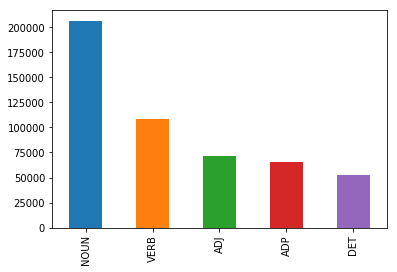

In [283]:
POS_table['POS'].value_counts()[:5].plot(kind='bar')

In [284]:
# Top 5 parts of Speech
POS_table['POS'].value_counts()[:5]

NOUN    206527
VERB    108376
ADJ      71932
ADP      65829
DET      52578
Name: POS, dtype: int64

In [285]:
# Remove Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in POS_table['Words'] if not w in stop_words]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [286]:
mapped=POS_table['Words'].isin(stop_words)

In [287]:
filtered=POS_table[-mapped]

In [288]:
filtered['POS'].value_counts()[:5]

NOUN    205652
VERB     75650
ADJ      68984
ADV      11304
ADP       5644
Name: POS, dtype: int64

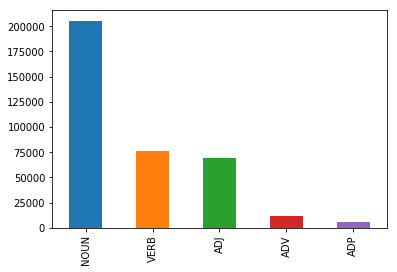

In [289]:
filtered['POS'].value_counts()[:5].plot(kind='bar')

A2. Does this data support Zipf’s law? Plot the most common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization. 

In [313]:
from collections import Counter
count_of_words=Counter(POS)

In [314]:
# creating oredred count of words table
count_of_words=pd.Series(count_of_words)
count_of_words=pd.DataFrame(count_of_words)
count_of_words.head(10)

0
a                                     DET   15367
aa                                    ADJ       9
                                      ADV       1
                                      NOUN     14
                                      VERB      3
aap                                   NOUN      3
aarca                                 NOUN      2
aaron                                 NOUN      4
                                      VERB      2
aaronwallerinteractionrecruitmentcouk VERB      1

In [315]:
count_of_words=count_of_words.reset_index()

In [316]:
count_of_words.columns=['word','POS','Frequency']
count_of_words=count_of_words.sort_values(by='Frequency', ascending=False)

In [317]:
check_top_word=count_of_words['Frequency'][0]
check_top_word

15367

In [318]:
count_of_words_filtered=count_of_words[:100]
count_of_words_filtered.head(5)

,word,POS,Frequency
1067,and,CONJ,26568
22685,the,DET,21037
22960,to,PRT,20424
0,a,DET,15367
15660,of,ADP,14441


In [321]:
count_of_words_filtered['Rank']=count_of_words_filtered['Frequency'].rank(ascending = False)

,word,POS,Frequency,Rank
1067,and,CONJ,26568,1.0
22685,the,DET,21037,2.0


In [322]:
count_of_words_filtered=count_of_words_filtered.set_index('word')

In [323]:
constant = count_of_words_filtered['Rank'].iloc[-1]*count_of_words_filtered['Frequency'].iloc[-1]

In [324]:
count_of_words_filtered['Y']=np.log(count_of_words_filtered['Rank'])
count_of_words_filtered['X']=np.log((count_of_words_filtered['Frequency'])/constant)

Doing Linear Regression

In [325]:
import statsmodels.api as sm
from patsy import dmatrices
Y, X = dmatrices('Y~X', data=count_of_words_filtered, return_type='dataframe')
##########
model = sm.OLS(Y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     7944.
Date:                Sun, 09 Sep 2018   Prob (F-statistic):           1.31e-95
Time:                        16:06:11   Log-Likelihood:                 86.447
No. Observations:                 100   AIC:                            -168.9
Df Residuals:                      98   BIC:                            -163.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3487      0.046     -7.599      0.0

### Observation for A2 <br/>
1. We see that the coefficient of X is very-very close to -1. Hence, our dataset follows Zipf's law. <br/>
2. We also plotted 2 simple graphs to see the trend

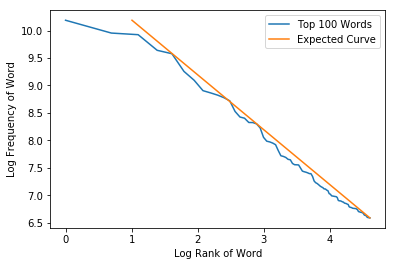

In [326]:
count_of_words_filtered['log Frequency']=np.log(count_of_words_filtered['Frequency'])
matplotlib.pyplot.plot(count_of_words_filtered['Y'], count_of_words_filtered['log Frequency'], linestyle='-',label='Top 100 Words')
matplotlib.pyplot.plot(log(constant)-count_of_words_filtered['log Frequency'],count_of_words_filtered['log Frequency'], linestyle='-', label='Expected Curve')
ylabel("Log Frequency of Word")
xlabel("Log Rank of Word")
legend(loc='best')

In [327]:
x=count_of_words_filtered['Frequency'].iloc[1]
k=[]
for i in range(1,101):
    l=x/i
    k.append(l)

In [328]:
count_of_words_filtered["Frequency_expected"]=k

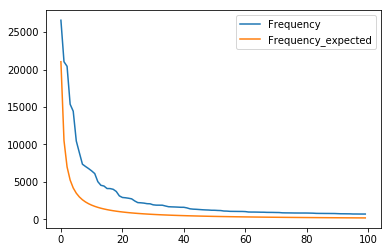

In [329]:
count_of_words_filtered.reset_index().sort_values(by='Rank')[['Frequency','Frequency_expected']].plot(kind='line')

A3. If we remove stopwords and lemmatize the data, what are the 10 most common words? What are their frequencies?

In [331]:
# list after removing stopwords
filtered.head(2)

,Words,POS
0,please,VERB
1,note,NOUN


In [347]:
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
filtered['Lemmas'] = map(lemma.lemmatize, filtered['Words'])

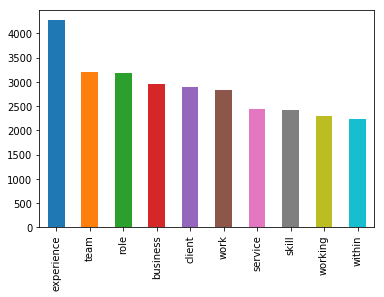

In [351]:
filtered['Lemmas'].value_counts()[:10].plot(kind='bar')

In [354]:
pd.DataFrame(filtered['Lemmas'].value_counts()[:10])

,Lemmas
experience,4272
team,3194
role,3181
business,2951
client,2896
work,2829
service,2441
skill,2430
working,2286
within,2225


### Part B Testing Predictive power of text & compare it with numeric

B1. Ignore the job descriptions, and train a model to predict high/low salary from all the numeric columns, e.g., part time/full time, contract vs. others, type of job (a lot of dummy variables), location (instead of using a huge number of dummy variables, you can use a list of cities in England with highest cost of living, and create a 0/1 variable which is 1 if the job is in one of those cities, else 0). Use the Naïve Bayes classifier. What is the accuracy of your model?    

Now build a classification model with text (full job description) as the only predictor. There are two versions of Naïve Bayes – binomial and multinomial; for the moment, let’s not bother about the theoretical underpinnings! You can use either one for this assignment. For all models, show the confusion matrix.


In [382]:
train.columns.values


array(['Id', 'Title', 'FullDescription', 'LocationRaw',
       'LocationNormalized', 'ContractType', 'ContractTime', 'Company',
       'Category', 'SourceName'], dtype=object)

In [ ]:
train['LocationNormalized'].unique()

In [373]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['FullDescription'])
X_train_counts.shape

(122463, 135633)

In [374]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(122463, 135633)

In [376]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, train[''])

<5x135633 sparse matrix of type '<type 'numpy.float64'>'
	with 609 stored elements in Compressed Sparse Row format>

In [394]:
data=Counter("This is my life".split())

In [404]:
DataFrame.from_dict(data, orient='index').T

,This,is,my,life
0,1,1,1,1


In [406]:
datatest=pd.DataFrame({'text': ["This is my life", "I make my own Rules"]})

In [408]:
datatest

,text
0,This is my life
1,Imake my own Rules
